<a href="https://colab.research.google.com/github/zangell44/DS-Sprint-02-Storytelling-With-Data/blob/master/module3-make-explanatory-visualizations/LS_DS_123_Make_explanatory_visualizations_LESSON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Choose appropriate visualizations


Recreate this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)

In [2]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

Using this data:

https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

### Stretch goals

Recreate more examples from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

For example:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) ([`altair`](https://altair-viz.github.io/gallery/index.html#maps))
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) ([`statsmodels`](https://www.statsmodels.org/stable/index.html))

In [0]:
% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight') # plt.stype.use.available to see more

In [0]:
# recreating plot with fake data
fake_data = pd.Series([38, 3, 2, 1, 2, 4, 7, 7, 7, 35],
                      index=range(1,11))


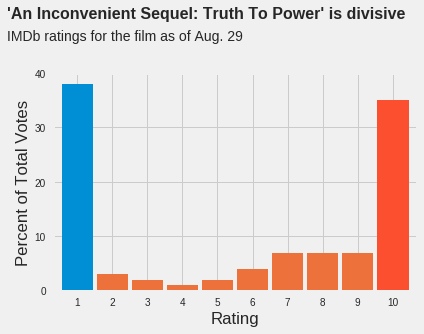

In [107]:
# plotting

colors = ['#EC713B'] * 10
colors[0] = 'C0'
colors[-1] = 'C1'

ax_fake = fake_data.plot.bar(color=colors,
                   width=0.9)

ax_fake.tick_params(labelrotation=0)
# ax_fake.set_xlabel('Rating')
# ax_fake.set_ylabel('Percent of Total Votes')
# ax_fake.set_title("'An Inconvenient Sequel: Truth To Power' is divisive")

ax_fake.set(xlabel='Rating',
            ylabel='Percent of Total Votes',
            yticks=range(0,50,10))

ax_fake.text(x=-2, y=50, 
             s="'An Inconvenient Sequel: Truth To Power' is divisive",
             fontsize=16,
             fontweight='bold')

ax_fake.text(x=-2, y=46, s='IMDb ratings for the film as of Aug. 29')
 
plt.tight_layout()

In [0]:
inconvenient_data_url = 'https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel'
!curl $inconvenient_data_url

In [0]:
# wrangling the real data
inconvenient_data_url_csv = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv'

df_ratings = pd.read_csv(inconvenient_data_url_csv)

In [57]:
df_ratings.tail()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,...,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
80048,2017-08-29 23:10:05.369510,8,IMDb staff,http://www.imdb.com/title/tt6322922/ratings-im...,8.4,7.2,8,1,0,0,...,12.5,0.0,0.0,0.0,0.0,12.5,12.5,25.0,25.0,12.5
80049,2017-08-29 23:10:05.598331,41,Top 1000 voters,http://www.imdb.com/title/tt6322922/ratings-to...,4.6,4.7,5,11,4,2,...,26.8,9.8,4.9,4.9,12.2,9.8,12.2,2.4,2.4,14.6
80050,2017-08-29 23:10:05.794141,925,US users,http://www.imdb.com/title/tt6322922/ratings-usa,4.8,5.0,4,405,34,20,...,43.8,3.7,2.2,0.9,1.0,3.2,5.8,5.0,6.5,28.0
80051,2017-08-29 23:10:06.022268,565,Non-US users,http://www.imdb.com/title/tt6322922/ratings-in...,6.4,6.5,7,129,11,10,...,22.8,1.9,1.8,1.4,5.7,8.3,9.2,6.5,6.2,36.1
80052,2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,...,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [0]:
# show max dataframe
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [56]:
df_ratings['category'].unique()

array(['Males', 'Females', 'Aged under 18', 'Males under 18',
       'Aged 18-29', 'Males Aged 18-29', 'Females Aged 18-29',
       'Aged 30-44', 'Males Aged 30-44', 'Females Aged 30-44', 'Aged 45+',
       'Males Aged 45+', 'Females Aged 45+', 'IMDb staff',
       'Top 1000 voters', 'US users', 'Non-US users', 'IMDb users',
       'Females under 18'], dtype=object)

In [0]:
df_users = df_ratings[df_ratings['category'] == 'IMDb users']

In [75]:
df_users.tail()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
79976,2017-08-29 22:30:06.423181,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
79995,2017-08-29 22:40:06.233659,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
80014,2017-08-29 22:50:06.592571,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
80033,2017-08-29 23:00:05.829558,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
80052,2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [76]:
df_users.dtypes

timestamp       object
respondents      int64
category        object
link            object
average        float64
mean           float64
median           int64
1_votes          int64
2_votes          int64
3_votes          int64
4_votes          int64
5_votes          int64
6_votes          int64
7_votes          int64
8_votes          int64
9_votes          int64
10_votes         int64
1_pct          float64
2_pct          float64
3_pct          float64
4_pct          float64
5_pct          float64
6_pct          float64
7_pct          float64
8_pct          float64
9_pct          float64
10_pct         float64
dtype: object

In [0]:
# pd.to_datetime(df_users['timestamp'])
# df_last_count = df_users.loc[df_users['timestamp'].idxmax()]

In [82]:
df_users.set_index('timestamp', inplace=True)
df_users.head()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:36.697246,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,5,9,10,18,24,30,256,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8
2017-07-17 12:34:21.250099,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,5,9,10,18,24,30,256,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8
2017-07-17 13:00:06.506688,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,5,9,10,18,24,30,256,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8
2017-07-17 14:00:06.727742,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
2017-07-17 15:00:06.055125,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7


In [84]:
df_users.dtypes

respondents      int64
category        object
link            object
average        float64
mean           float64
median           int64
1_votes          int64
2_votes          int64
3_votes          int64
4_votes          int64
5_votes          int64
6_votes          int64
7_votes          int64
8_votes          int64
9_votes          int64
10_votes         int64
1_pct          float64
2_pct          float64
3_pct          float64
4_pct          float64
5_pct          float64
6_pct          float64
7_pct          float64
8_pct          float64
9_pct          float64
10_pct         float64
dtype: object

In [0]:
lastday = df_users.tail(1)

In [0]:
columns = ['1_pct', '2_pct', '3_pct', '4_pct', '5_pct',
           '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']
final=lastday[columns]

data = final.T
data.index = range(1,11)

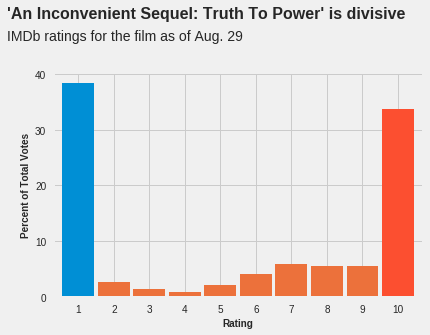

In [132]:
# plotting

# array of colors instead

colors = ['#EC713B'] * 10
colors[0] = 'C0'
colors[-1] = 'C1'

ax_real = data['2017-08-29 23:10:06.218251'].plot.bar(color=colors,
                   width=0.9)

ax_real.tick_params(labelrotation=0)
ax_real.set_xlabel('Rating', fontsize=10, fontweight='bold')
ax_real.set_ylabel('Percent of Total Votes', fontsize=10, fontweight='bold')

ax_real.set(yticks=range(0,50,10))

ax_real.text(x=-2, y=50, 
             s="'An Inconvenient Sequel: Truth To Power' is divisive",
             fontsize=16,
             fontweight='bold')

ax_real.text(x=-2, y=46, s='IMDb ratings for the film as of Aug. 29')

#ax_real.get_legend().remove()
 
plt.tight_layout()

# Recreating Other Data Visualizations

In [300]:
# having some fun with visualization of russian troll tweets
# https://github.com/fivethirtyeight/russian-troll-tweets

import glob

troll_url_1 = 'https://raw.githubusercontent.com/fivethirtyeight/russian-troll-tweets/master/IRAhandle_tweets_1.csv'
troll_url_2 = 'https://raw.githubusercontent.com/fivethirtyeight/russian-troll-tweets/master/IRAhandle_tweets_2.csv'
troll_url_3 = 'https://raw.githubusercontent.com/fivethirtyeight/russian-troll-tweets/master/IRAhandle_tweets_3.csv'
troll_url_4 = 'https://raw.githubusercontent.com/fivethirtyeight/russian-troll-tweets/master/IRAhandle_tweets_4.csv'
troll_url_5 = 'https://raw.githubusercontent.com/fivethirtyeight/russian-troll-tweets/master/IRAhandle_tweets_5.csv'
troll_url_6 = 'https://raw.githubusercontent.com/fivethirtyeight/russian-troll-tweets/master/IRAhandle_tweets_6.csv'
troll_url_7 = 'https://raw.githubusercontent.com/fivethirtyeight/russian-troll-tweets/master/IRAhandle_tweets_7.csv'
troll_url_8 = 'https://raw.githubusercontent.com/fivethirtyeight/russian-troll-tweets/master/IRAhandle_tweets_8.csv'
troll_url_9 = 'https://raw.githubusercontent.com/fivethirtyeight/russian-troll-tweets/master/IRAhandle_tweets_9.csv'
troll_url_10 = 'https://raw.githubusercontent.com/fivethirtyeight/russian-troll-tweets/master/IRAhandle_tweets_10.csv'
troll_url_11 = 'https://raw.githubusercontent.com/fivethirtyeight/russian-troll-tweets/master/IRAhandle_tweets_11.csv'
troll_url_12 = 'https://raw.githubusercontent.com/fivethirtyeight/russian-troll-tweets/master/IRAhandle_tweets_12.csv'
troll_url_13 = 'https://raw.githubusercontent.com/fivethirtyeight/russian-troll-tweets/master/IRAhandle_tweets_13.csv'

troll_urls = [troll_url_1, troll_url_2, troll_url_3, troll_url_4, troll_url_5,
              troll_url_6, troll_url_7, troll_url_8, troll_url_9, troll_url_10,
              troll_url_11, troll_url_12, troll_url_13]

df_troll = pd.concat([pd.read_csv(f) for f in troll_urls], ignore_index = True)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (0,15,20) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (10,20) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [301]:
df_troll.shape

(2946207, 21)

In [302]:
# tweets by language
df_troll['language'].value_counts()

English                2116867
Russian                 610943
German                   86983
Ukrainian                38669
Italian                  18063
Serbian                   9480
Uzbek                     9334
Bulgarian                 9236
LANGUAGE UNDEFINED        8320
Arabic                    7588
Macedonian                5178
French                    4562
Spanish                   3011
Norwegian                 2237
Farsi (Persian)           1684
Romanian                  1629
Dutch                     1165
Swedish                   1014
Vietnamese                 982
Estonian                   770
Japanese                   764
Catalan                    589
Finnish                    579
Albanian                   572
Croatian                   544
Icelandic                  498
Pushto                     487
Portuguese                 463
Turkish                    445
Lithuanian                 416
Polish                     386
Somali                     276
Slovak  

In [303]:
# tweets by country 
df_troll['region'].value_counts()

United States                2046709
Unknown                       561994
Azerbaijan                     96333
United Arab Emirates           74675
Russian Federation             37589
Belarus                        27802
Germany                        27178
United Kingdom                 18048
Italy                          13474
Iraq                           11117
Ukraine                         5765
Malaysia                        4932
Afghanistan                     4888
Israel                          3604
France                           942
Canada                           608
Iran, Islamic Republic of        541
Spain                            515
Egypt                            232
Japan                            108
Greece                            81
Saudi Arabia                      55
Sweden                            52
Mexico                            41
Samoa                             32
India                             22
Finland                           20
T

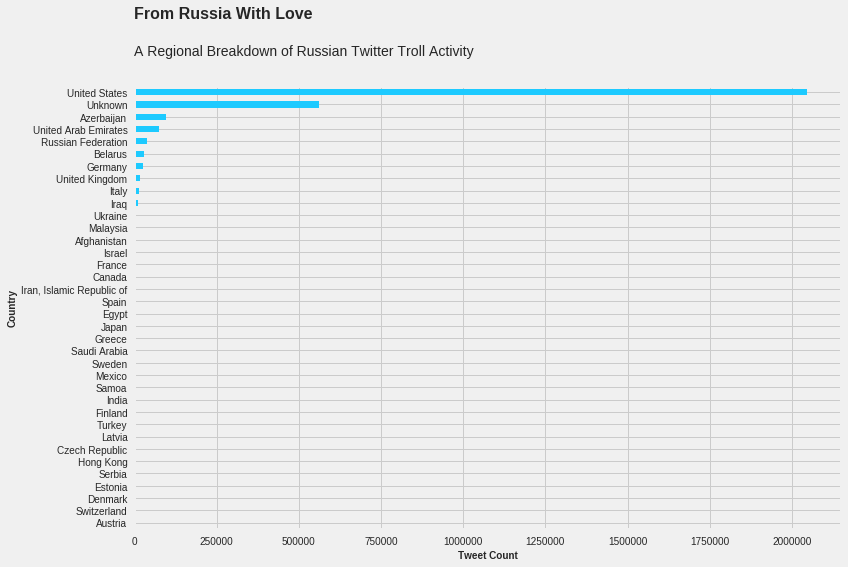

In [308]:
# visualizing tweets by country
plt.style.use('fivethirtyeight')

fig_region, ax_region = plt.subplots(figsize=(12,7))

ax_region = df_troll['region'].value_counts(ascending=True).plot.barh(color='#1dcaff')

ax_region.tick_params(labelrotation=0)
ax_region.set_xlabel('Tweet Count', fontsize=10, fontweight='bold')
ax_region.set_ylabel('Country', fontsize=10, fontweight='bold')


ax_region.text(x=0, y=41, 
             s='From Russia With Love',
             fontsize=16,
             fontweight='bold')

ax_region.text(x=0, y=38, s='A Regional Breakdown of Russian Twitter Troll Activity')

 
plt.tight_layout()
plt.show();

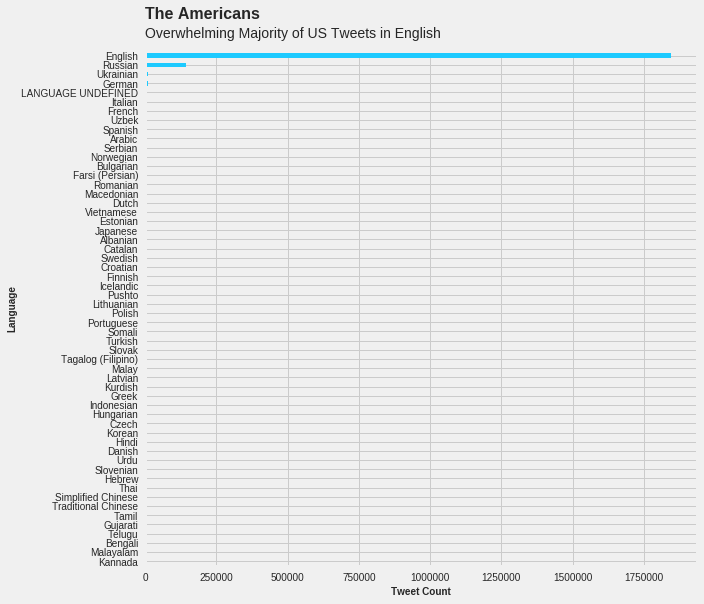

In [314]:
# breakdown of tweets by language in the US
fig_us_lang, ax_us_lang = plt.subplots(figsize=(10,8))

ax_us_lang = df_troll[df_troll['region']=='United States']['language'].value_counts(ascending=True).plot.barh(color='#1dcaff')

ax_us_lang.tick_params(labelrotation=0)
ax_us_lang.set_xlabel('Tweet Count', fontsize=10, fontweight='bold')
ax_us_lang.set_ylabel('Language', fontsize=10, fontweight='bold')

ax_us_lang.text(x=0, y=59, 
             s='The Americans',
             fontsize=16,
             fontweight='bold')

ax_us_lang.text(x=0, y=57, s='Overwhelming Majority of US Tweets in English')

 
plt.tight_layout()
plt.show();

In [315]:
# where were things tweeted in English?
df_troll[df_troll['language']=='English']['region'].value_counts()

United States                1844451
Unknown                       240953
United Kingdom                 16663
Azerbaijan                      6911
Germany                         1285
Russian Federation              1145
Italy                           1125
Canada                           600
Afghanistan                      461
Belarus                          449
Iraq                             427
Israel                           409
United Arab Emirates             370
Ukraine                          146
Spain                             72
France                            67
Egypt                             59
Sweden                            43
Mexico                            41
Iran, Islamic Republic of         20
Greece                            12
Finland                            8
Malaysia                           4
Latvia                             3
Czech Republic                     2
Serbia                             2
Hong Kong                          1
S

English tweets originated overwhelmingly in the US, let's analyze those further.

In [0]:
# analyzing US tweets in English
tweets_english = df_troll[(df_troll['language']=='English') & (df_troll['region']=='United States')]

In [317]:
# when did US trolls tweet the most?

### TAKES A FEW MINUTES RIGHT NOW, SHOULD BE ABLE TO DO FASTER ###

# create new column in the form of day + month + year, drop the hours and minutes
tweets_english['publish_day'] = pd.to_datetime(tweets_english['publish_date']).dt.date


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [318]:
# what were the top days that trolls tweeted?
tweets_english['publish_day'].value_counts()[0:6]

2016-10-06    17984
2016-10-07     9620
2016-09-19     8367
2015-07-22     7848
2016-09-17     7201
2016-12-19     6769
Name: publish_day, dtype: int64

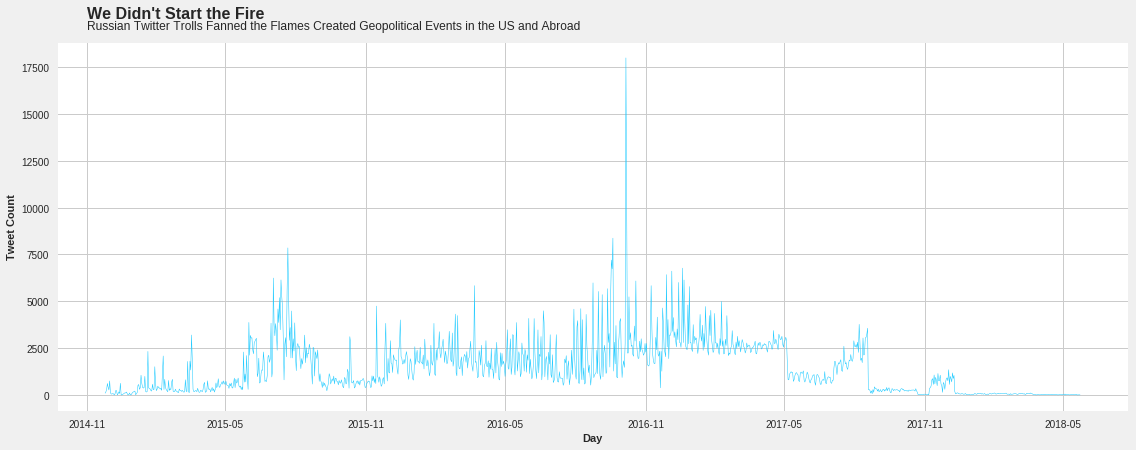

In [322]:
# daily count of tweets from the trolls

import datetime
tweets_by_day = tweets_english[tweets_english['publish_day']>=datetime.date(2014, 11, 1)]['publish_day'].value_counts(sort=False)


fig_daily_count, ax_daily_count = plt.subplots(figsize=(16,6))

ax_daily_count = tweets_by_day.plot.line(linewidth=0.5,
                                         color='#1dcaff')

ax_daily_count.tick_params(labelrotation=0)
ax_daily_count.set_xlabel('Day', fontsize=11, fontweight='bold')
ax_daily_count.set_ylabel('Tweet Count', fontsize=11, fontweight='bold')

# axes.text objects have to be in the units used on the underlying axes

# title
ax_daily_count.text(x=datetime.date(2014, 11, 1), y=20100, s="We Didn't Start the Fire",
                    fontsize=16,
                    fontweight='bold')

# sub-title
ax_daily_count.text(x=datetime.date(2014, 11, 1), y=19500, 
                    s="Russian Twitter Trolls Fanned the Flames Created Geopolitical Events in the US and Abroad",
                    fontsize=12)

# annotations


# ax_daily_count.annotate('2018 Presidential Election',
#             xy=(datetime.date(2016,11,8), 140), xycoords='data',
#             xytext=(datetime.date(2016,11,8), 116), #textcoords='axes fraction',
#             size=10,
#             bbox=dict(boxstyle="round4,pad=.5", fc="0.8"),
#             arrowprops=dict(arrowstyle="->",
#                             connectionstyle="angle,angleA=0,angleB=90,rad=10"))

# # text box formatting
# bbox_args = dict(boxstyle="round", fc="#c0deed", ec='black')

# # election day
# ax_daily_count.annotate('2016 Presidential Election', xy=(datetime.date(2016,11,8), 116), # xy coordinates of arrow head
#                         xytext=(datetime.date(2016,11,15), 140), # xy coordinates of text box
#                         fontsize=11,
#                         bbox=bbox_args,
#                         arrowprops=dict(facecolor='black', 
#                                         shrink=0.05,
#                                         width=2),
#                         )

# # NY/NJ bombings
# ax_daily_count.annotate('Rahimi \nbombings \nin NY/NJ', xy=(datetime.date(2016,9,19), 98), 
#                         xytext=(datetime.date(2016,6,19), 120),
#                         fontsize=11,
#                         bbox=bbox_args,
#                         arrowprops=dict(facecolor='black', 
#                                         shrink=0.05,
#                                         width=2),
#                         )

# # Trump ditches Fox News primary debate
# ax_daily_count.annotate('Trump refuses\n to show\n for Fox\n primary\n debate', 
#                         xy=(datetime.date(2016,1,29), 141), 
#                         xytext=(datetime.date(2016,3,19), 120),
#                         fontsize=11,
#                         bbox=bbox_args,
#                         arrowprops=dict(facecolor='black', 
#                                         shrink=0.05,
#                                         width=2),
#                         )

# # Paris attacks occur on Friday night November 13th
# ax_daily_count.annotate('Aftermath of \nParis concert \nterrorist attack', 
#                         xy=(datetime.date(2015,11,15), 117), 
#                         xytext=(datetime.date(2015,7,19), 110),
#                         fontsize=11,
#                         bbox=bbox_args,
#                         arrowprops=dict(facecolor='black', 
#                                         shrink=0.05,
#                                         width=2),
#                         )


# background color
ax_daily_count.set_facecolor('white')
  
plt.tight_layout()
plt.show();

In [0]:
# when did US trolls reach the most followers?

# what time did most trolls tweet? include other regions too?

# what kind of content were different accounts tweeting?


In [185]:
# language processing imports - time to go off the deep end
!pip install -U nltk
import nltk

Requirement already up-to-date: nltk in /usr/local/lib/python3.6/dist-packages (3.3)
